<a href="https://colab.research.google.com/github/teemo007/py_project2/blob/main/pj1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import libraries
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd

In [ ]:
# creat a dictionary to store the players's URL and team type.
player_info = {
 "manSwim":[ "https://csidolphins.com/sports/mens-swimming-and-diving/roster",
            "https://yorkathletics.com/sports/mens-swimming-and-diving/roster",
            'https://athletics.baruch.cuny.edu/sports/mens-swimming-and-diving/roster',
            'https://www.brooklyncollegeathletics.com/sports/mens-swimming-and-diving/roster',
            'https://lindenwoodlions.com/sports/mens-swimming-and-diving/roster',
            'https://mckbearcats.com/sports/mens-swimming-and-diving/roster',
            'https://ramapoathletics.com/sports/mens-swimming-and-diving/roster',
            'https://oneontaathletics.com/sports/mens-swimming-and-diving/roster',
            'https://bubearcats.com/sports/mens-swimming-and-diving/roster/2021-22',
            'https://albrightathletics.com/sports/mens-swimming-and-diving/roster'
   
 ],"womenSwim":['https://csidolphins.com/sports/womens-swimming-and-diving/roster',
               'https://queensknights.com/sports/womens-swimming-and-diving/roster',
               'https://yorkathletics.com/sports/womens-swimming-and-diving/roster',
               'https://athletics.baruch.cuny.edu/sports/womens-swimming-and-diving/roster/2021-22?path=wswim',
               'https://www.brooklyncollegeathletics.com/sports/womens-swimming-and-diving/roster',
               'https://lindenwoodlions.com/sports/womens-swimming-and-diving/roster',
               'https://mckbearcats.com/sports/womens-swimming-and-diving/roster',
               'https://ramapoathletics.com/sports/womens-swimming-and-diving/roster',
               'https://keanathletics.com/sports/womens-swimming-and-diving/roster',
               'https://oneontaathletics.com/sports/womens-swimming-and-diving/roster',
 ],
  "manVoll":['https://ccnyathletics.com/sports/mens-volleyball/roster',
             'https://lehmanathletics.com/sports/mens-volleyball/roster',
             'https://www.brooklyncollegeathletics.com/sports/mens-volleyball/roster',
             'https://johnjayathletics.com/sports/mens-volleyball/roster',
             'https://athletics.baruch.cuny.edu/sports/mens-volleyball/roster',
             'https://mecathletics.com/sports/mens-volleyball/roster',
             'https://www.huntercollegeathletics.com/sports/mens-volleyball/roster',
             'https://yorkathletics.com/sports/mens-volleyball/roster',
             'https://ballstatesports.com/sports/mens-volleyball/roster',
             'https://lewisflyers.com/sports/mens-volleyball/roster'
     
  ],
  "womenVoll":['https://bmccathletics.com/sports/womens-volleyball/roster',
               'https://yorkathletics.com/sports/womens-volleyball/roster',
               'https://hostosathletics.com/sports/womens-volleyball/roster',
               'https://bronxbroncos.com/sports/womens-volleyball/roster/2021',
               'https://queensknights.com/sports/womens-volleyball/roster',
               'https://augustajags.com/sports/wvball/roster',
               'https://flaglerathletics.com/sports/womens-volleyball/roster',
               'https://yhcathletics.com/sports/womens-volleyball/roster',
               'https://pacersports.com/sports/womens-volleyball/roster',
               'https://www.golhu.com/sports/womens-volleyball/roster'
     
  ]
}

In [ ]:
name_list = [] #list of names
heights_list = [] #list of heights
team_list = [] # for making new dataframe and present the plot chart( x - xias)
ave_list = []  # for making new dataframe and present the plot chart( y - xias)
 

In [ ]:
#intialise player data of lists
player_dictioanry = {"Name" : name_list,
                     "Heights" : heights_list
}

In [ ]:
#this function for scrape the data and calculation.
def scrape_date(type, url):
 #sent a request
 res = requests.request('GET', url=url)
 soup = BeautifulSoup(res.content, "html.parser")
 
   # implement the logic. looking for all the tr tag.
 for names in soup.find_all("tr"):
        #finding the specific td tag in the tr tag
     cell1 = names.find("td",class_='sidearm-table-player-name')
     cell2 = names.find("td",class_='height')
    
        # find out some None type, it needs to be fitler out. the rest is what I want.(e.g <td class='height'>Daniel Angulo</td>....)
     if cell1 is not None:
        name_list.append(cell1.get_text().strip()) #put the filtered names in the the name_list.
     if cell2 is not None:
        heights = cell2.get_text().strip() ##put the filtered heights in the the name_list.
       
          # determine column contains "-" or not
        if  heights != '-':
           x = heights.split('-') #assign variable x to get the context from td tag and split the height into feet and inches.
           y = float(x[0]) * 12 + float(x[1])  # 1ft = 12″
           heights_list.append(y)
        else:
           heights_list.append(np.nan) #assign the NaN  for non-numeric type
         #“Python: Pandas Dataframe.” GeeksforGeeks, https://www.geeksforgeeks.org/python-pandas-dataframe/.
    

manSwim's average height is 71.6 inches.

manSwim Top 5 tallest
                    Name  Heights  rank_tall
79        Colton Grimes     78.0        1.0
113      Josh Templeton     78.0        1.0
20         Kasper Gacek     77.0        2.0
148          Eric Kroon     77.0        2.0
54          Zach Linder     77.0        2.0
42          Jerry Brown     77.0        2.0
71        Owen Brubaker     76.0        3.0
62            Evan Root     76.0        3.0
93       Xander Skinner     76.0        3.0
95         Gavin Wagner     76.0        3.0
50          Kyle Holzum     76.0        3.0
120         Kyle Copper     76.0        3.0
144       Brian Harding     76.0        3.0
164   Nicholas Griffith     76.0        3.0
90          Robert Ross     75.0        4.0
151        Ryan Maierle     75.0        4.0
87         Macoy Neinas     75.0        4.0
159        Henry Shemet     75.0        4.0
4          Chris Ivanov     75.0        4.0
81          Noah Javens     75.0        4.0
170    Pete

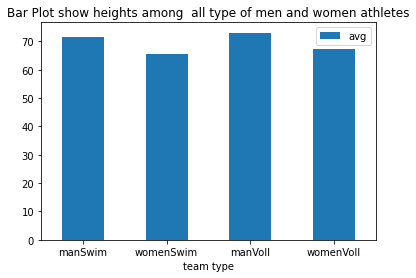

In [ ]:
#iterate the dictionary and pass the Corresponding value to scrape_date function
for x,y in player_info.items():
#print(x)
 for key in y:
  #print(key,y[key])
  scrape_date(x,key) #calling the funtion
#creating a dataframe from player_dictionary 
 roster = pd.DataFrame(player_dictioanry)
 name_list.clear()    # need to empty the list to store the team type, otherwise result will come with last team data.
 heights_list.clear() # need to empty the list to store the heights, otherwise result will come with last heights.
 roster.to_csv(x+".csv") #output as csv
 print(f"{x}'s average height is {round(roster['Heights'].mean(),2)} inches.\n") #using pandas mean functiuon return the mean of the heights column.
 
 team_list.append(x) # put all team type in to new dataframe
 ave_list.append(roster['Heights'].mean()) # put all 4 average height in to new dataframe
 
 
 roster = roster[roster['Heights'].notna()] #filter all the nan value, only rank the non-nan value
 roster2 = roster.copy()# need a copy to do the shortest  ranking 
 roster['rank_tall'] = roster['Heights'].rank(method='dense',ascending=False) # rank the dataframe in descending order of Heights and if found two scores are same then assign the same rank.
 roster2['rank_short'] =roster2['Heights'].rank(method='dense',ascending=True) # rank the dataframe in ascending order of Heights and if found two scores are same then assign the same rank.
 print(x + " Top 5 tallest\n" , roster[roster['rank_tall'] < 6].sort_values('rank_tall'),"\n" ) # present the Top 5 tall after ranking
 print(x + " Top 5 shortest\n" , roster2[roster2['rank_short'] < 6].sort_values('rank_short'),"\n" ) # present the Top 5 short after ranking
 
roster3 = pd.DataFrame({
                         'team type': team_list, # this dataframe for Plot chart
                         'avg': ave_list }
                      )
if (roster3['avg'][0] + roster3['avg'][1]) / 2 > (roster3['avg'][2] + roster3['avg'][3]) / 2:
  print("The average height of swimmers is higher than the average height of volleyball players \n")
else:
  print("The average height of volleyball players is higher than the average height of swimmers \n")

print(roster3.plot.bar('team type','avg',rot = 0, title ='Bar Plot show heights among  all type of men and women athletes') ) 